# Stock-Bond ETF Allocation Model

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [10]:
tickers = ['SPY', 'TLT']
etf = yf.Tickers(tickers)
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Price                           Close                   High             \
Ticker                            SPY        TLT         SPY        TLT   
Date                                                                      
2002-08-01 00:00:00+00:00   58.653862  39.650063   60.351772  39.659615   
2002-08-02 00:00:00+00:00   57.339165  40.056118   58.739778  40.175546   
2002-08-05 00:00:00+00:00   55.343964  40.232895   57.431670  40.337992   
2002-08-06 00:00:00+00:00   57.207035  39.888912   58.072510  40.079998   
2002-08-07 00:00:00+00:00   58.204628  39.984432   58.468895  40.194626   
...                               ...        ...         ...        ...   
2024-08-26 00:00:00+00:00  560.789978  98.139999  563.909973  98.699997   
2024-08-27 00:00:00+00:00  561.559998  97.970001  562.059998  98.080002   
2024-08-28 00:00:00+00:00  558.299988  97.849998  561.650024  98.199997   
2024-08-29 00:00:00+00:00  558.349976  97.529999  563.679993  97.639999   
2024-08-30 00:00:00+00:00  563.679993  96.489998  564.200012  97.989998   

Price                             Low                   Open             \
Ticker                            SPY        TLT         SPY        TLT   
Date                                                                      
2002-08-01 00:00:00+00:00   58.356565  39.430316   60.041258  39.430316   
2002-08-02 00:00:00+00:00   56.566187  39.592737   58.468902  39.726499   
2002-08-05 00:00:00+00:00   55.198621  40.056140   57.140975  40.146907   
2002-08-06 00:00:00+00:00   56.229253  39.755154   56.308534  40.065667   
2002-08-07 00:00:00+00:00   56.665276  39.822012   58.052678  39.936662   
...                               ...        ...         ...        ...   
2024-08-26 00:00:00+00:00  559.049988  98.080002  563.179993  98.690002   
2024-08-27 00:00:00+00:00  558.320007  97.410004  559.489990  97.489998   
2024-08-28 00:00:00+00:00  555.039978  97.730003  561.210022  98.010002   
2024-08-29 00:00:00+00:00  557.179993  97.129997  560.309998  97.370003   
2024-08-30 00:00:00+00:00  557.140015  96.470001  560.770020  97.680000   

Price                        Volume            
Ticker                          SPY       TLT  
Date                                           
2002-08-01 00:00:00+00:00  66571900     25000  
2002-08-02 00:00:00+00:00  51772900     52800  
2002-08-05 00:00:00+00:00  47191300     61100  
2002-08-06 00:00:00+00:00  64730000     64900  
2002-08-07 00:00:00+00:00  43289400     40300  
...                             ...       ...  
2024-08-26 00:00:00+00:00  35788600  23198700  
2024-08-27 00:00:00+00:00  32693900  21507700  
2024-08-28 00:00:00+00:00  41066000  18501400  
2024-08-29 00:00:00+00:00  38715200  24988200  
2024-08-30 00:00:00+00:00  62667800  42848400  

[5559 rows x 10 columns]

In [11]:
data.drop(['Open', 'High', 'Low', 'Volume'],inplace=True, axis=1)
data

Price                           Close           
Ticker                            SPY        TLT
Date                                            
2002-08-01 00:00:00+00:00   58.653862  39.650063
2002-08-02 00:00:00+00:00   57.339165  40.056118
2002-08-05 00:00:00+00:00   55.343964  40.232895
2002-08-06 00:00:00+00:00   57.207035  39.888912
2002-08-07 00:00:00+00:00   58.204628  39.984432
...                               ...        ...
2024-08-26 00:00:00+00:00  560.789978  98.139999
2024-08-27 00:00:00+00:00  561.559998  97.970001
2024-08-28 00:00:00+00:00  558.299988  97.849998
2024-08-29 00:00:00+00:00  558.349976  97.529999
2024-08-30 00:00:00+00:00  563.679993  96.489998

[5559 rows x 2 columns]

In [12]:
data = data.droplevel(0, axis=1)
data

Ticker,SPY,TLT
Date,,
2002-08-01 00:00:00+00:00,58.653862,39.650063
2002-08-02 00:00:00+00:00,57.339165,40.056118
2002-08-05 00:00:00+00:00,55.343964,40.232895
2002-08-06 00:00:00+00:00,57.207035,39.888912
2002-08-07 00:00:00+00:00,58.204628,39.984432
...,...,...
2024-08-26 00:00:00+00:00,560.789978,98.139999
2024-08-27 00:00:00+00:00,561.559998,97.970001
2024-08-28 00:00:00+00:00,558.299988,97.849998


<Axes: xlabel='Date'>

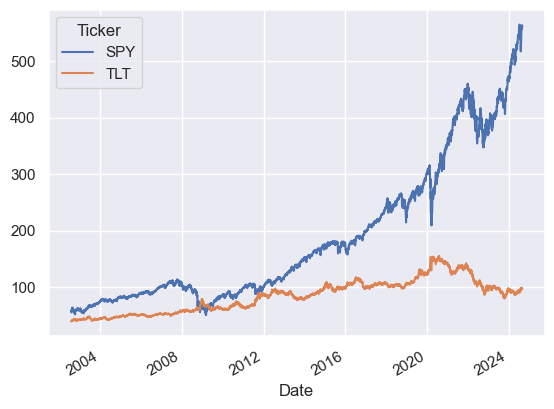

In [13]:
data.plot()

### Daily return

<Axes: xlabel='Date'>

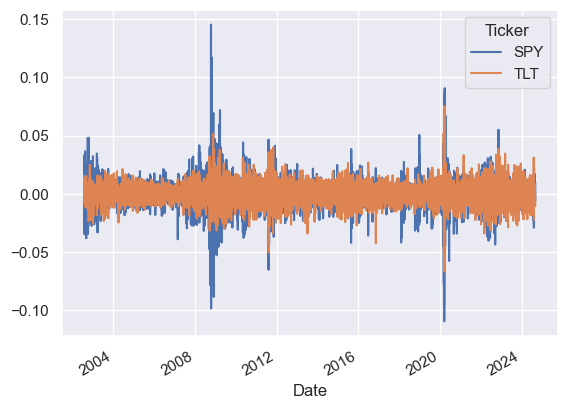

In [14]:
rets = data.pct_change().fillna(0)
rets.plot()

# Individual stock's avg return, vol, sharpe ratio

In [16]:
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)
stock_sr = stock_mu/stock_sigma


bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)
bond_sr = bond_mu/bond_sigma

print(stock_sr, bond_sr)

0.6359923464936791 0.3507250703080194


## 60: 40

In [17]:
weights = 0.6
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']
port_ret.dropna(inplace=True)
port_ret

Date
2002-08-01 00:00:00+00:00    0.000000
2002-08-02 00:00:00+00:00   -0.009352
2002-08-05 00:00:00+00:00   -0.019113
2002-08-06 00:00:00+00:00    0.016778
2002-08-07 00:00:00+00:00    0.011421
                               ...   
2024-08-26 00:00:00+00:00   -0.002447
2024-08-27 00:00:00+00:00    0.000131
2024-08-28 00:00:00+00:00   -0.003973
2024-08-29 00:00:00+00:00   -0.001254
2024-08-30 00:00:00+00:00    0.001462
Length: 5559, dtype: float64

<Axes: xlabel='Date'>

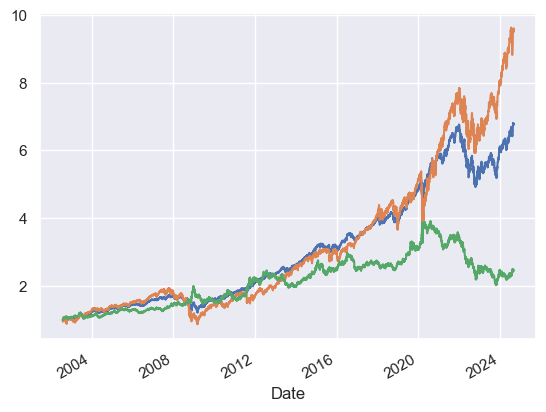

In [18]:
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

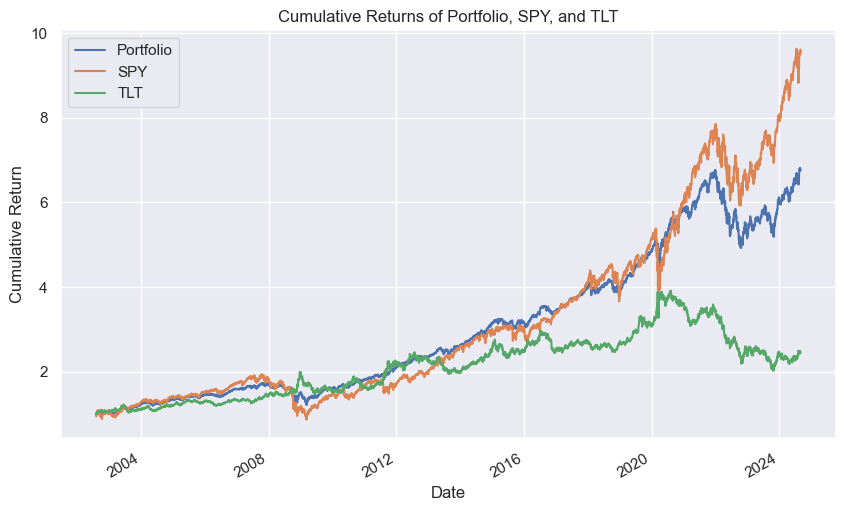

In [20]:
import matplotlib.pyplot as plt

# Assuming port_ret, rets['SPY'], and rets['TLT'] are already defined and contain return data

# Calculate cumulative returns
cum_port_ret = (1 + port_ret).cumprod()
cum_SPY = (1 + rets['SPY']).cumprod()
cum_TLT = (1 + rets['TLT']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
cum_port_ret.plot(label='Portfolio')
cum_SPY.plot(label='SPY')
cum_TLT.plot(label='TLT')


# Customize the plot
plt.title('Cumulative Returns of Portfolio, SPY, and TLT')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## PF's Return and Vol Analysis

In [22]:
port_mu = port_ret.mean() * 252
port_sigma = port_ret.std() * np.sqrt(252)

print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.09267747884916695
Vol = 0.10941335682270961
SR = 0.8470399002503779


## Stock-Bond Correlation

In [23]:
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])
historical_corr

Date
2002-08-01 00:00:00+00:00         NaN
2002-08-02 00:00:00+00:00         NaN
2002-08-05 00:00:00+00:00         NaN
2002-08-06 00:00:00+00:00         NaN
2002-08-07 00:00:00+00:00         NaN
                               ...   
2024-08-26 00:00:00+00:00    0.211467
2024-08-27 00:00:00+00:00    0.210847
2024-08-28 00:00:00+00:00    0.211036
2024-08-29 00:00:00+00:00    0.206132
2024-08-30 00:00:00+00:00    0.200895
Length: 5559, dtype: float64

<Axes: xlabel='Date'>

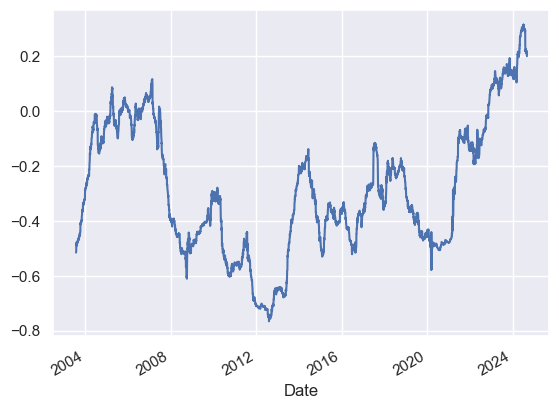

In [24]:
historical_corr.plot()